## Weather forecasting using LSTM

#### In this project we are going to use weather dataset for time series forecasting and we are predicting future 30 days weather by using LSTM

Time series analysis is a statistical method to analyse the past data within a given duration of time to forecast the future. It comprises of ordered sequence of data at equally spaced interval.To understand the time series data & the analysis let us consider an example. Consider an example of Airline Passenger data. It has the count of passenger over a period of time.



In [258]:
import pandas as pd
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [259]:
df= pd.read_csv('data/processed_data.csv')
df.head()


,DateTime,Year,Month,Date,Time,Minute,Temperature,Previous Day Average,Two Days Before Average,Three Days Before Average,Last 7 Days Average,Previous Day Wind Speed,Previous Day Rainfall
0,2008-01-08 00:01:00,2008,1,8,0,1,14.7,16.0375,13.475,11.404167,29.403571,18.708333,0.0
1,2008-01-08 10:01:00,2008,1,8,1,1,15.0,16.0375,13.475,11.404167,29.403571,18.708333,0.0
2,2008-01-08 20:01:00,2008,1,8,2,1,14.9,16.0375,13.475,11.404167,29.403571,18.708333,0.0
3,2008-01-08 03:01:00,2008,1,8,3,1,14.9,16.0375,13.475,11.404167,29.403571,18.708333,0.0
4,2008-01-08 04:01:00,2008,1,8,4,1,15.0,16.0375,13.475,11.404167,29.403571,18.708333,0.0


In [260]:
import pandas as pd
df["DateTime"] = pd.to_datetime(df["DateTime"], format="%Y-%m-%d %H:%M:%S")

In [261]:
data = pd.DataFrame(list(df['Temperature']), index=df['DateTime'], columns=['Temperature'])
df = df[df['Temperature'] != 3276.7]
threshold = 5
mean_Y = np.mean(df['Temperature'])
std_Y = np.std(df['Temperature'])
lower_bound = mean_Y - threshold * std_Y
upper_bound = mean_Y + threshold * std_Y
df = df[(df['Temperature'] >= lower_bound) & (df['Temperature'] <= upper_bound)]
df = df.drop_duplicates(subset=["Year", "Month", "Date", "Time"])

In [262]:
data

,Temperature
DateTime,
2008-01-08 00:01:00,14.7
2008-01-08 10:01:00,15.0
2008-01-08 20:01:00,14.9
2008-01-08 03:01:00,14.9
2008-01-08 04:01:00,15.0
...,...
2023-06-29 03:40:00,21.7
2023-06-29 03:40:00,21.7
2023-06-29 03:40:00,21.7


Now we are using only data for 365 days

In [263]:
# df=data[:365]

In [264]:
df.shape

(134195, 13)

In [265]:
df.isnull().sum()

DateTime                       0
Year                           0
Month                          0
Date                           0
Time                           0
Minute                         0
Temperature                    0
Previous Day Average           0
Two Days Before Average        0
Three Days Before Average      0
Last 7 Days Average            0
Previous Day Wind Speed      662
Previous Day Rainfall        662
dtype: int64

In [266]:
df=df.dropna(axis=0)

In [267]:
df.shape

(133533, 13)

In [268]:
df=df['Temperature'].values

In [269]:
df[:5]

array([14.7, 15. , 14.9, 14.9, 15. ])

In [270]:
df=df.reshape(-1,1)

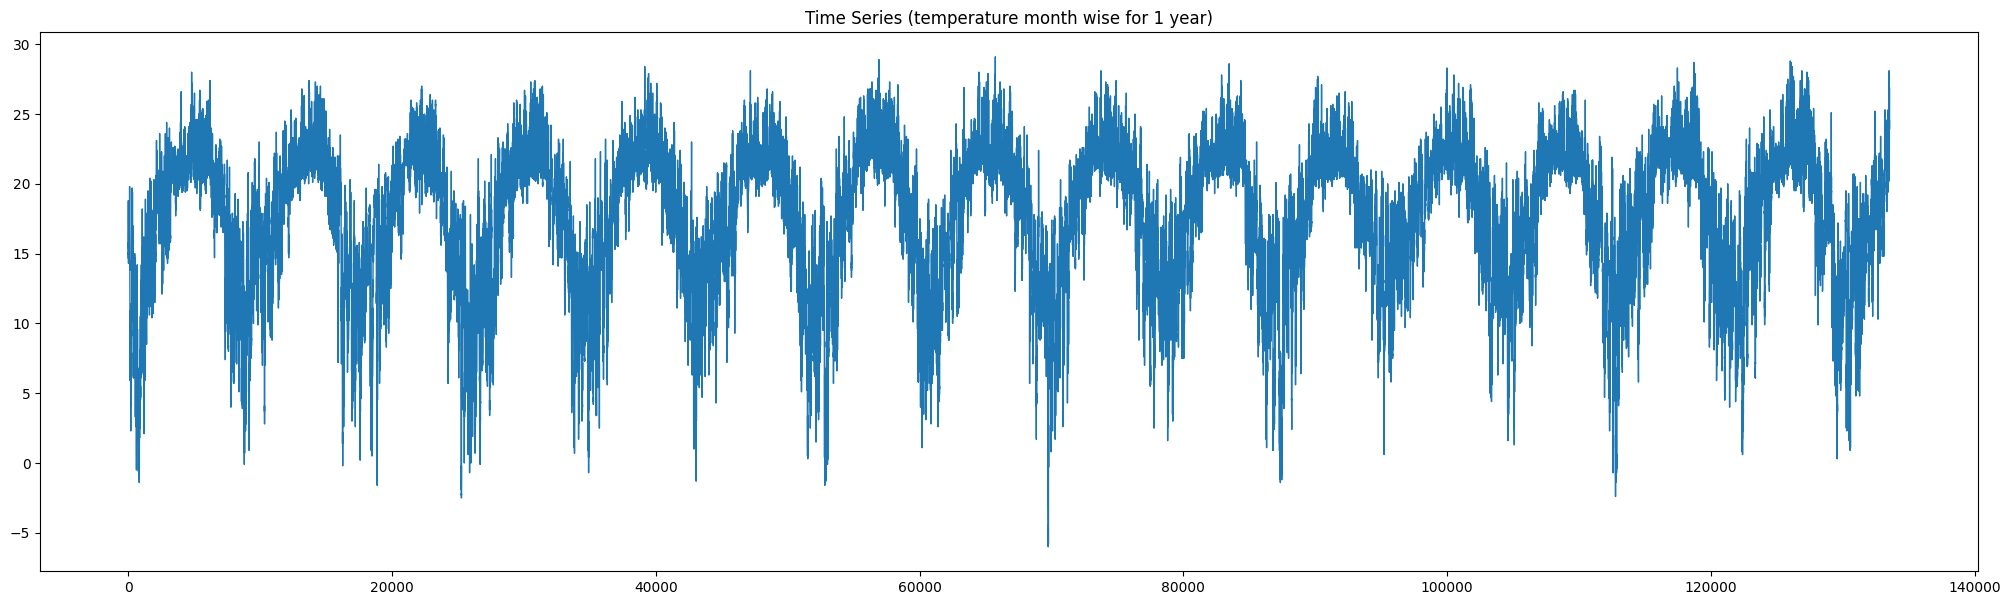

In [271]:
plt.figure(figsize=(25, 7))
plt.plot(df, linewidth=1)
# plt.grid()
plt.title("Time Series (temperature month wise for 1 year)")
plt.show()

#### Scaling data 

In [272]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

In [273]:
data_scaled[:5]

array([[0.58974359],
       [0.5982906 ],
       [0.5954416 ],
       [0.5954416 ],
       [0.5982906 ]])

In [274]:
data_scaled.shape

(133533, 1)

In [275]:
steps= 20
inp = []
out = []
for i in range(len(data_scaled) - (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [276]:
out[:10]

[array([0.62108262]),
 array([0.62108262]),
 array([0.6039886]),
 array([0.60683761]),
 array([0.6011396]),
 array([0.58974359]),
 array([0.57834758]),
 array([0.58689459]),
 array([0.60968661]),
 array([0.6039886])]

reshape 

In [277]:
import numpy as np

In [278]:
inp= np.asanyarray(inp)
out= np.asanyarray(out)

In [279]:
len(df)*0.65

86796.45

In [280]:
x_train = inp[:237,:,:]
x_test = inp[237:,:,:]    
y_train = out[:237]    
y_test= out[237:]

In [281]:
inp.shape

(133513, 20, 1)

In [282]:
x_train.shape

(237, 20, 1)

In [283]:
x_test.shape

(133276, 20, 1)

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow import keras

### Model Building

In [285]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

2023-06-29 19:00:14.893146: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 19:00:14.895417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 19:00:14.897129: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-06-29 19:00:15.229113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 19:00:15.231826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 19:00:15.233797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [286]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)
model.fit(x_train, y_train, epochs=300, verbose=1,
          callbacks=[early_stopping, lr_scheduler])


Epoch 1/300


2023-06-29 19:00:16.146018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 19:00:16.150587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 19:00:16.152783: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 6s 28ms/step - loss: 0.2512 - lr: 0.0010
Epoch 2/300
8/8 [==============================] - 0s 23ms/step - loss: 0.0841 - lr: 0.0010
Epoch 3/300
8/8 [==============================] - 0s 24ms/step - loss: 0.0741 - lr: 0.0010
Epoch 4/300
8/8 [==============================] - 0s 24ms/step - loss: 0.0623 - lr: 0.0010
Epoch 5/300
8/8 [==============================] - 0s 23ms/step - loss: 0.0533 - lr: 0.0010
Epoch 6/300
8/8 [==============================] - 0s 30ms/step - loss: 0.0500 - lr: 0.0010
Epoch 7/300
8/8 [==============================] - 0s 28ms/step - loss: 0.0453 - lr: 0.0010
Epoch 8/300
8/8 [==============================] - 0s 29ms/step - loss: 0.0476 - lr: 0.0010
Epoch 9/300
8/8 [==============================] - 0s 25ms/step - loss: 0.0458 - lr: 0.0010
Epoch 10/300
8/8 [==============================] - 0s 23ms/step - loss: 0.0432 - lr: 0.0010
Epoch 11/300
8/8 [==============================] - 0s 24ms/step - loss: 0.0427 - lr: 0.001

In [287]:
# model.evaluate(x_test, y_test)

### Predictions and Model evaluation

Predictions on training set

In [288]:
print("Predicted Value",model.predict(x_train)[4][0])
print("Expected value",y_train[4][0])

2023-06-29 19:01:20.522589: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 19:01:20.525920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 19:01:20.527729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 1s 8ms/step
Predicted Value 0.6187962
Expected value 0.6011396011396011


Predictions on testing set

In [289]:
predictions=model.predict(x_test)

4165/4165 [==============================] - 38s 9ms/step


In [290]:
print("Predicted Value",predictions[2][0])
print("Expected Value",y_test[2][0])

Predicted Value 0.40917325
Expected Value 0.40740740740740744


In [291]:
predictions.shape

(133276, 1)

In [292]:
y_test.shape

(133276, 1)

In [293]:
pred_df=pd.DataFrame(predictions)

In [294]:
pred_df['TrueValues']=y_test

In [295]:
pred_df_new = pred_df.rename(columns={ 0: 'Predictions'})

In [296]:
scaler.inverse_transform(pred_df_new)

array([[ 8.55098452,  8.6       ],
       [ 8.6433277 ,  8.3       ],
       [ 8.36198108,  8.3       ],
       ...,
       [25.96070663, 24.1       ],
       [24.90684358, 24.2       ],
       [25.73453767, 24.5       ]])

Text(0.5, 1.0, 'Predictions VS True Values on Testing Set')

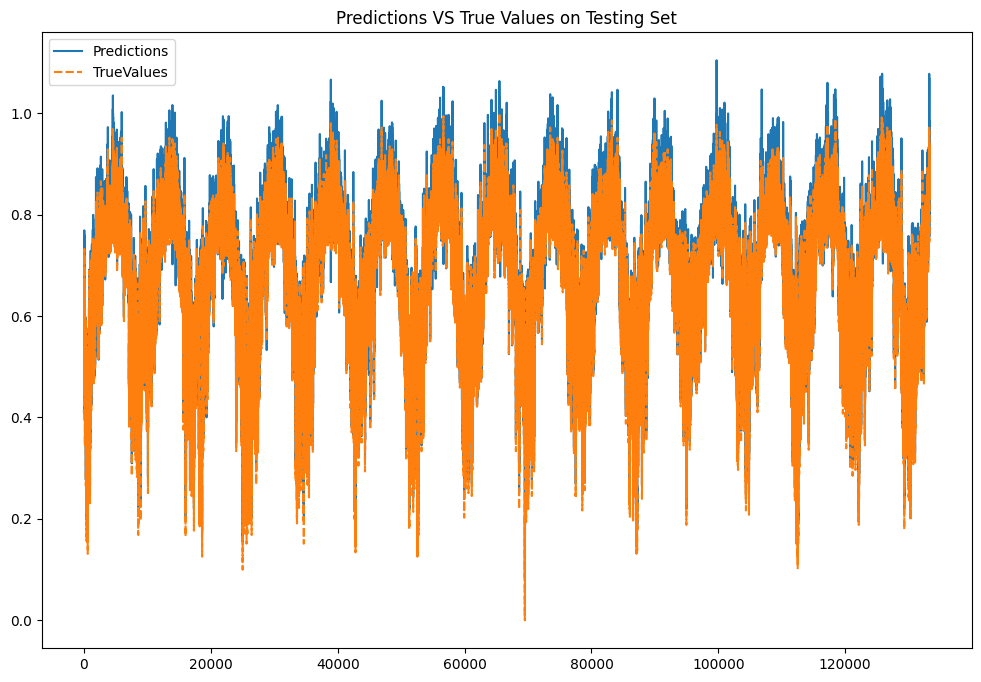

In [297]:
plt.figure(figsize=(12,8))
sns.lineplot(data= pred_df_new)
plt.title("Predictions VS True Values on Testing Set")

### Weather Predictions for next 30 Days

we are using last 10 days input for 1st day output

In [298]:
data_scaled.shape

(133533, 1)

In [299]:
x_input=data_scaled[:20]

In [300]:
x_input.shape

(20, 1)

In [301]:
# now reshaping the data
x_input = x_input.reshape(1, -1)

In [302]:
x_input.shape

(1, 20)

In [303]:
x_input = x_input.reshape((1, 20,1))
yhat = model.predict(x_input, verbose=0)

In [304]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

creatitng a  functions which returns the next 30 days prediction

In [307]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 20
i = 0
while (i < 30):

    if (len(temp_input) > 20):
        # print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1


print(lst_output)


0 day input [list([0.5982905982905984]) list([0.5954415954415955])
 list([0.5954415954415955]) list([0.5982905982905984])
 list([0.5982905982905984]) list([0.6125356125356125])
 list([0.6011396011396011]) list([0.5954415954415955])
 list([0.603988603988604]) list([0.6153846153846154])
 list([0.6096866096866097]) list([0.6324786324786325])
 list([0.6780626780626782]) list([0.7065527065527066])
 list([0.6296296296296298]) list([0.6524216524216524])
 list([0.6353276353276354]) list([0.6096866096866097])
 list([0.6153846153846154]) 0.6230745315551758]


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [308]:
# day_new = np.arange(1,363)
day_pred = np.arange(1,31)

ValueError: x and y must have same first dimension, but have shapes (30,) and (0,)

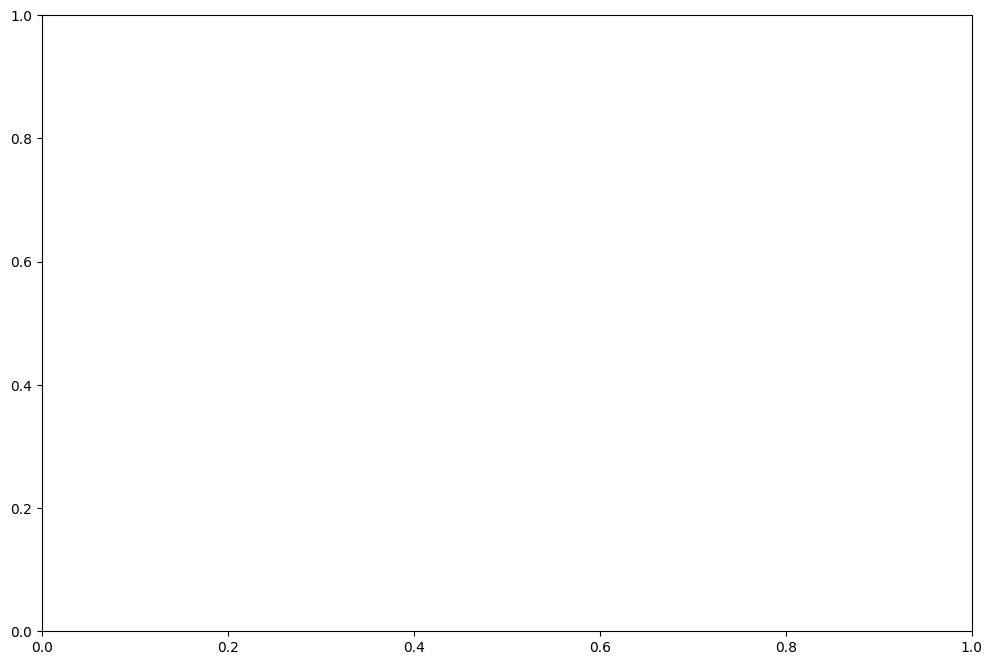

In [309]:
plt.figure(figsize=(12, 8))
# plt.plot(day_new, data_scaled)
plt.plot(day_pred, lst_output)


In [310]:
data_scaled[:5]

array([[0.58974359],
       [0.5982906 ],
       [0.5954416 ],
       [0.5954416 ],
       [0.5982906 ]])

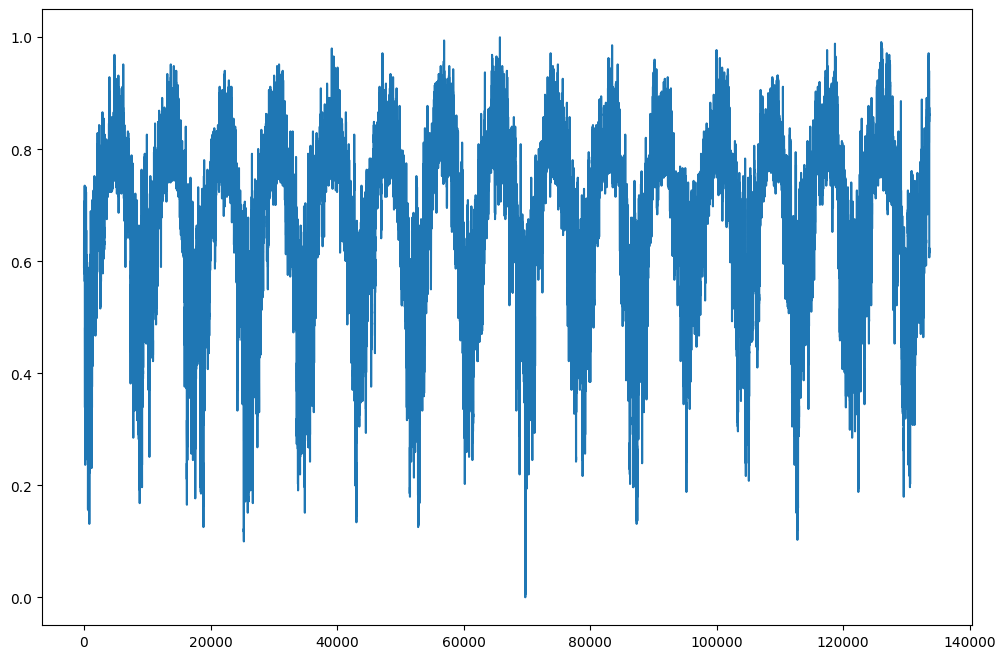

In [ ]:
df3 = data_scaled.tolist()
df3.extend(lst_output)
plt.figure(figsize=(12,8))
plt.plot(df3)


## Thanks You!!!!